In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
import statsmodels.api as sm

Задание №1. Проведите корреляционный анализ данных из файла 'ex1.csv' по Пирсону

In [2]:
# считывание файла
df1 = pd.read_csv('ex1.csv')

Типы элементов:
x    float64
y    float64
dtype: object


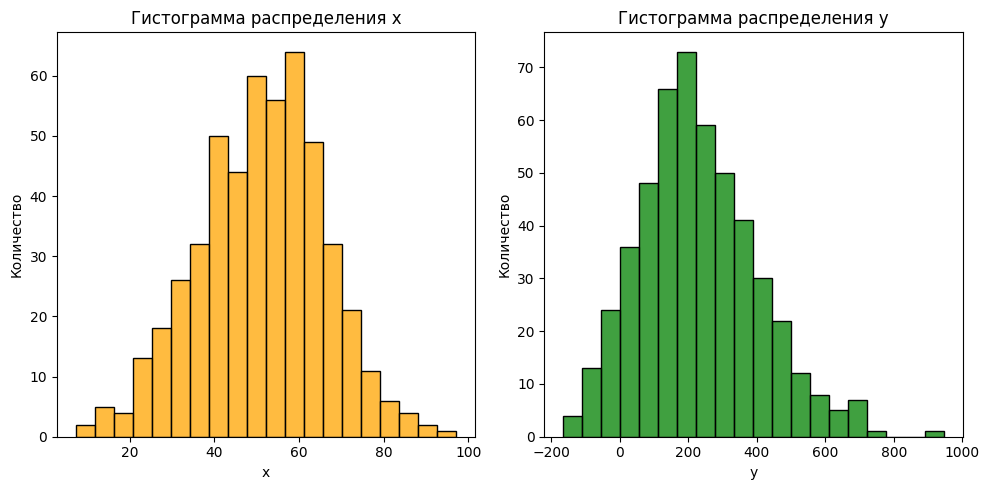

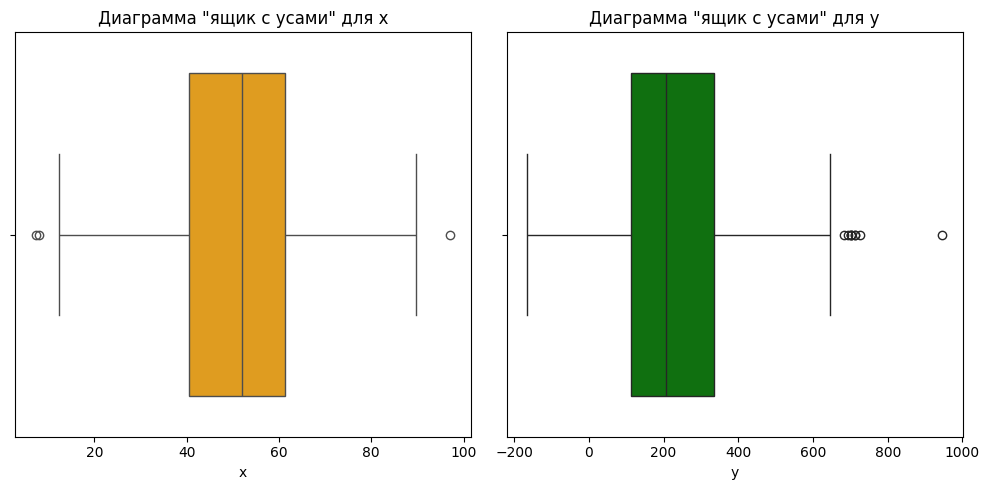

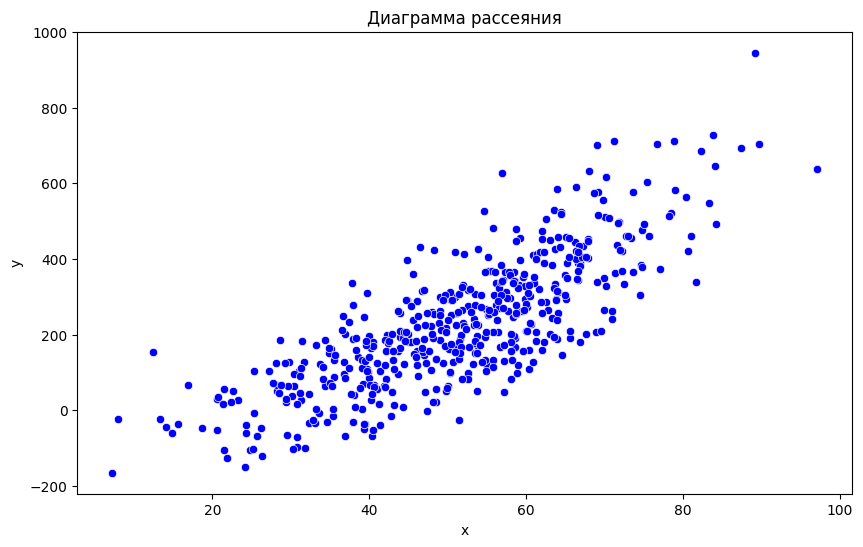

Сильная линейная зависимость между x и y.


In [43]:
# КРИТЕРИЙ 1

# проверка, что все элементы - численного типа
print('Типы элементов:\n', df1.dtypes, sep='')

# построение гистограмм распределения
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df1['x'], bins=20, color='orange')
plt.title('Гистограмма распределения x')
plt.xlabel('x')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
sns.histplot(df1['y'], bins=20, color='green')
plt.title('Гистограмма распределения y')
plt.xlabel('y')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

# построение "ящика с усами" для изучения выбросов
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df1['x'], color='orange')
plt.title('Диаграмма "ящик с усами" для x')

plt.subplot(1, 2, 2)
sns.boxplot(x=df1['y'], color='green')
plt.title('Диаграмма "ящик с усами" для y')

plt.tight_layout()
plt.show()

# построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['x'], y=df1['y'], color='blue')
plt.title('Диаграмма рассеяния')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# вывод о целесообразности использования корреляции Пирсона с обоснованием на основе предшествующих графиков
corr = df1['x'].corr(df1['y'])
if abs(corr) >= 0.7:
    print('Сильная линейная зависимость между x и y.')
elif 0.5 <= abs(correlation) < 0.7:
    print('Умеренная линейная зависимость между x и y.')
elif 0.3 <= abs(correlation) < 0.5:
    print('Слабая линейная зависимость между x и y.')
else:
    print('Очень слабая или отсутствующая линейная зависимость между x и y.')

Распределение данных для x и y похоже на нормальное. На диаграмме рассеяния их связь напоминает линейную. На диаграммах "ящик с усами" видны выбросы для обеих переменных, но на диаграмме рассеяния они не сильно выделяются. Считаю, что коэффициент корреляции Пирсона может быть подходящим.

In [45]:
# КРИТЕРИЙ 2

# расчет коэффициента Пирсона
alpha = 0.05
n = df1.shape[0]
r, p_value = sc.stats.pearsonr(df1['x'], df1['y'])
print('Коэффициент корреляции Пирсона:', r)
print('p_value:', p_value)

# расчет t-критерия
t = r * (n - 2)**0.5 / (1 - r**2)**0.5
print('t-критерий:', t)
critical = sc.stats.t.ppf(1 - alpha / 2, df = n - 2)
print('Табличное значение:', critical)
if np.abs(t) > critical:
    print("Связь статистически значима.")
else:
    print("Связь статистически не значима.")

# расчет p_value
p_value = (1 - sc.stats.t.cdf(np.abs(t), df = n - 2)) * 2
print('p_value :', p_value)
if p_value < alpha:
    print("Связь статистически значима")
else:
    print("Связь статистически не значима.")

# вывод о степени корреляции величин и статистической значимости их взаимосвязи

Коэффициент корреляции Пирсона: 0.8032321850936794
p_value: 3.973859056368235e-114
t-критерий: 30.092129139493785
Критическое значение: 1.9647389829672648
Связь статистически значима.
p_value : 0.0
Связь статистически значима


Коэффициент корреляции приблизительно равен 0.8, что говорит о сильной прямой взаимосвязи. t-критерий как минимум на порядок больше критического, связь можно считать статистически значимой.

Задание №2. Проведите корреляционный анализ данных из файла 'ex2.csv' по Спирмену

In [40]:
# считывание файла
df2 = pd.read_csv('ex2.csv')

Типы элементов:
x    float64
y    float64
dtype: object


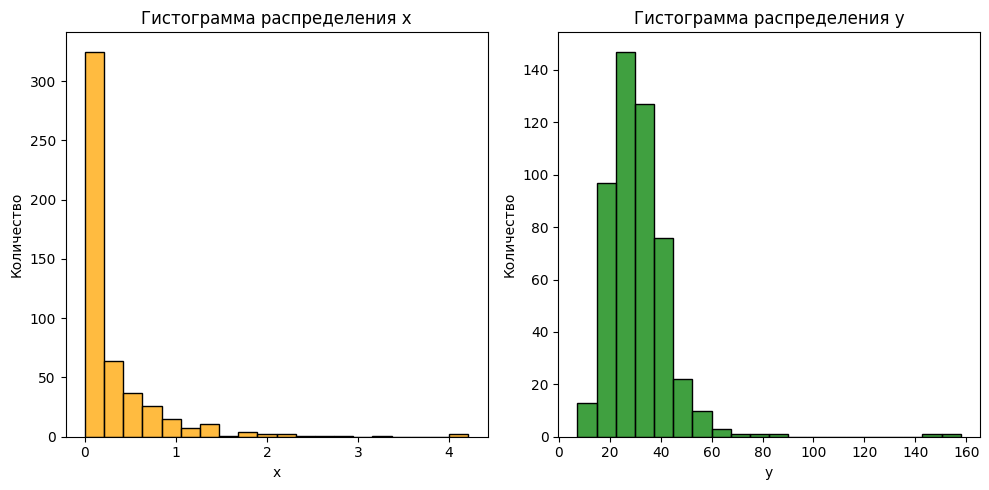

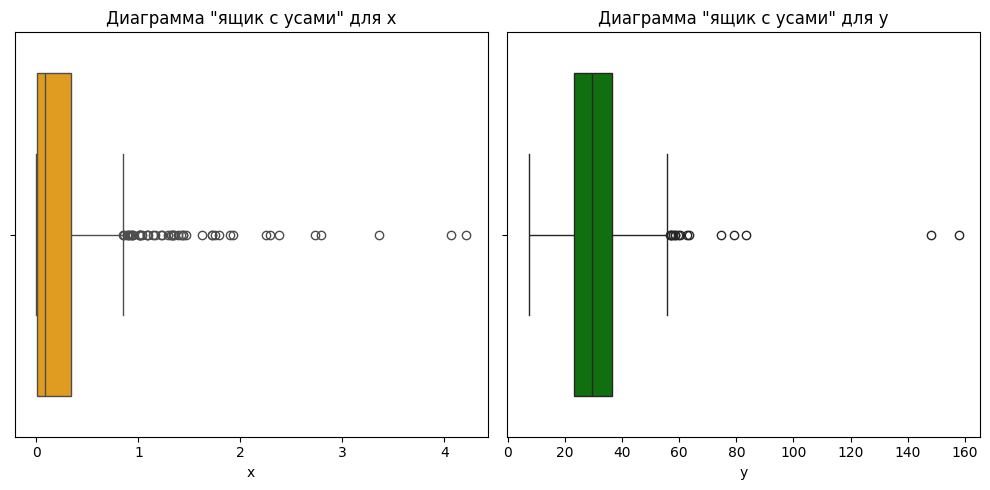

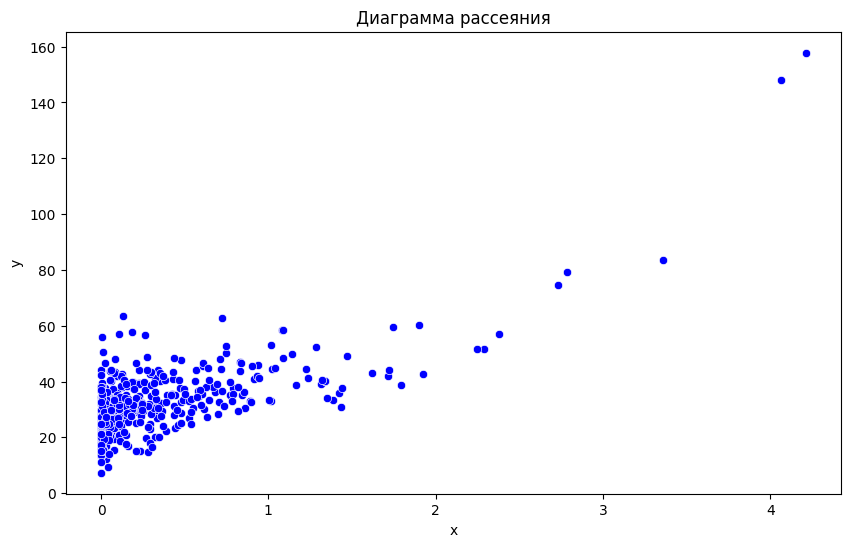

In [46]:
# КРИТЕРИЙ 3

# проверка, что все элементы - численного типа
print('Типы элементов:\n', df2.dtypes, sep='')

# построение гистограмм распределения
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df2['x'], bins=20, color='orange')
plt.title('Гистограмма распределения x')
plt.xlabel('x')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
sns.histplot(df2['y'], bins=20, color='green')
plt.title('Гистограмма распределения y')
plt.xlabel('y')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

# построение "ящика с усами" для изучения выбросов
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df2['x'], color='orange')
plt.title('Диаграмма "ящик с усами" для x')

plt.subplot(1, 2, 2)
sns.boxplot(x=df2['y'], color='green')
plt.title('Диаграмма "ящик с усами" для y')

plt.tight_layout()
plt.show()

# построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df2['x'], y=df2['y'], color='blue')
plt.title('Диаграмма рассеяния')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# вывод о целесообразности использования корреляции Спирмена с обоснованием на основе предшествующих графиков


Распределение данных для x и y не нормальное. На диаграмме рассеяния их связь не напоминает линейную. На диаграммах "ящик с усами" видно значительное число выбросов. Считаю, что коэффициент Спирмена может быть подходящим.

In [53]:
# КРИТЕРИЙ 4

# расчет коэффициента Спирмена
alpha = 0.05
corr, p_value = sc.stats.spearmanr(df2['x'], df2['y'])
print('Корреляция Спирмена:', corr)
print('p_value для корреляции Спирмена:', p_value)

# расчет t-критерия
n = len(df2)
t = corr * np.sqrt((n - 2) / (1 - corr**2))
print('t-критерий:', t)
df = n - 2
critical = sc.stats.t.ppf(1 - alpha / 2, df)
print('Табличное значение:', critical)


# вывод о степени корреляции величин и статистической значимости их взаимосвязи
if abs(corr) < 0.3:
    corr_strength = "Слабая"
elif abs(corr) < 0.7:
    corr_strength = "Умеренная"
else:
    corr_strength = "Сильная"

print("Степень корреляции:", corr_strength)

Корреляция Спирмена: 0.6170866283465134
p_value для корреляции Спирмена: 8.471901488365329e-54
t-критерий: 17.50023569782885
Табличное значение: 1.9647389829672648
Степень корреляции: Умеренная


Значение t-критерия говорит о том, что связь статистически значима.

Задание №3. Проведите линейный регрессионный анализ данных из файла 'ex3.csv'

In [57]:
# считывание файла
df3 = pd.read_csv('ex3.csv')
print('Типы элементов:\n', df2.dtypes, sep='')

Типы элементов:
x    float64
y    float64
dtype: object


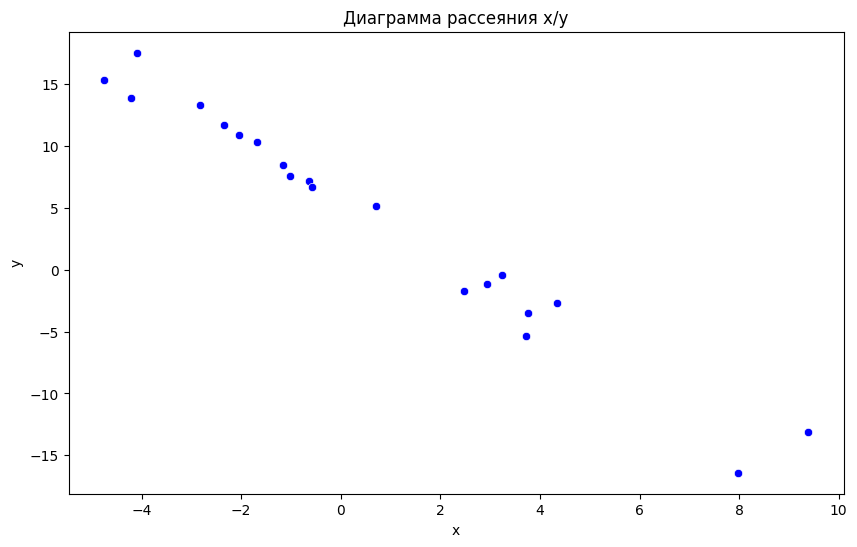

In [159]:
# КРИТЕРИЙ 5

# построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df3['x'], y=df3['y'], color='blue')
plt.title('Диаграмма рассеяния x/y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [58]:
# вывод о целесообразности использования корреляции Пирсона

Обе переменные числовые. На диаграмме рассеяния видна обратная линейная зависимость и отсутствие заметных выбросов. Считаю, что коэффициент корреляции Пирсона может быть подходящим.

In [87]:
# расчет коэффициента Пирсона
alpha = 0.05
n = df3.shape[0]
corr, p_value = sc.stats.pearsonr(df3['x'], df3['y'])
print('Коэффициент корреляции Пирсона:', corr)
print('p_value для корреляции Пирсона:', p_value)

if p_value < alpha:
    print('Корреляция Пирсона статистически значима.')
else:
    print('Корреляция Пирсона статистически не значима.')

if abs(corr) < 0.3:
    corr_strength = "Слабая"
elif abs(corr) < 0.7:
    corr_strength = "Умеренная"
else:
    corr_strength = "Сильная"

print("Степень корреляции:", corr_strength)

Коэффициент корреляции Пирсона: -0.9851417834585037
p_value для корреляции Пирсона: 3.176453356769297e-15
Корреляция Пирсона статистически значима.
Степень корреляции: Сильная


Коэффициент наклона -2.3391357411141347, сдвиг 5.740762449346206


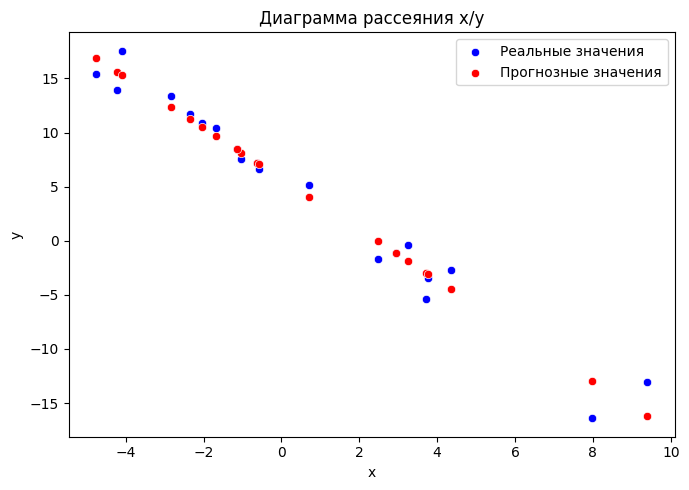

In [158]:
# КРИТЕРИЙ 6

# расчет коэффициентов линейной регрессии
res = sc.stats.linregress(df3['x'], df3['y'])
print(f'Коэффициент наклона {res.slope}, сдвиг {res.intercept}')

# построение диаграммы рассеяния прогнозных и реальных значений на одном графике
y_pred = res.intercept + res.slope*df3['x']

plt.figure(figsize=(7, 5))
sns.scatterplot(x=df3['x'], y=df3['y'], color='blue', label='Реальные значения')
sns.scatterplot(x=df3['x'], y=y_pred, color='red', label='Прогнозные значения')
plt.title('Диаграмма рассеяния x/y')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

In [89]:
# КРИТЕРИЙ 7

# расчет средней ошибки аппроксимации
mae = np.mean(np.abs((df3['y'] - y_pred) / df3['y']) ) * 100

print('Средняя ошибка аппроксимации (MAE): ', mae, '%', sep='')

Средняя ошибка аппроксимации (MAE): 35.26380487772689%


In [90]:
# КРИТЕРИЙ 8

# расчет F-критерия
f = (res.rvalue**2 / (1 - res.rvalue**2)) * (n - 2)
critical = sc.stats.f.ppf(1 - alpha, 1, n - 1 - 1)
print(f'f={f}\nТабличное значение={critical}')
# вывод о статистической значимости уравнения в целом


f=592.2591378853061
Табличное значение=4.413873419170567


Признаём статистически значимым т.к. f-критерий намного больше критического

In [92]:
# КРИТЕРИЙ 9

# расчет стандартных ошибок коэффициентов регрессии и коэффициента корреляции
print(f'Ошибка наклона {res.stderr},\nОшибка сдвига {res.intercept_stderr}')

# расчет t-критерия коэффициентов регрессии и коэффициента корреляции
alpha = 0.05
t_coef = abs(sc.stats.t.ppf(alpha / 2, n - 2))
t_real = f ** 0.5
print(f'Расчетное значение t-критерия: {t_real}\nТабличное значение t-критерия: {t_coef}')

Ошибка наклона 0.09611685229891045,
Ошибка сдвига 0.3755103704947338
Расчетное значение t-критерия: 24.336374789300606
Табличное значение t-критерия: 2.10092204024096


In [93]:
# вывод о статистической значимости коэффициентов регрессии

Значения t-критерия для коэффициентов больше критического, поэтому они статистически значимы.

In [97]:
# запись диапазона коэффицентов регрессии
print(f"slope (95%): [{res.slope - t_coef*res.stderr}, {res.slope + t_coef*res.stderr}]")
print(f"intercept (95%): [{res.intercept - t_coef*res.intercept_stderr}, {res.intercept + t_coef*res.intercept_stderr}]")

slope (95%): [-2.5410697545475007, -2.1372017276807687]
intercept (95%): [4.95184443563477, 6.529680463057641]


In [100]:
# КРИТЕРИЙ 10

# Дать предсказание в виде интервальной оценки для y при x0 = 6
x0 = 6
y0 = res.intercept + res.slope * x0
var_o = (y_pred - df3['y'])**2
S0 = (var_o.sum() / (n - 1 - 1))**0.5
delta = S0 * (1 + 1 / n + (x0 - df3['x'].mean())**2 / (n * df3['x'].var())) * t_coef
print(f'При x0={x0}: y принимает значения в интервале {y0-delta} < y0 < {y0+delta}')

При x0=6: y принимает значения в интервале -12.262910058301554 < y0 < -4.32519393637565


Задание №4. Проведите линейный регрессионный анализ данных из файла 'ex4.csv'

In [101]:
# считывание файла
df4 = pd.read_csv('ex4.csv')

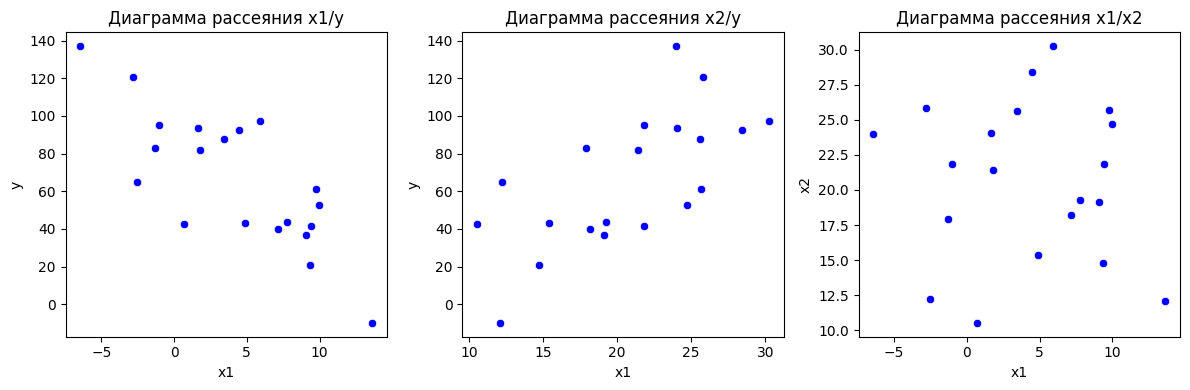

In [152]:
# КРИТЕРИЙ 11

# построение диаграмм рассеяния (x1/y, x2/y, x1/x2)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x=df4['x1'], y=df4['y'], color='blue')
plt.title('Диаграмма рассеяния x1/y')
plt.xlabel('x1')
plt.ylabel('y')

plt.subplot(1, 3, 2)
sns.scatterplot(x=df4['x2'], y=df4['y'], color='blue')
plt.title('Диаграмма рассеяния x2/y')
plt.xlabel('x1')
plt.ylabel('y')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df4['x1'], y=df4['x2'], color='blue')
plt.title('Диаграмма рассеяния x1/x2')
plt.xlabel('x1')
plt.ylabel('x2')

plt.tight_layout()
plt.show()

In [ ]:
# вывод о корректности использования модели множественной регрессии

По диаграммам можно предположить прямую зависимость y от x2, обратную от x1 и отсутствие зависимости между x1 и x2. Считаю, что модель множественной регрессии подойдет

In [104]:
# расчет коэффициентов корреляции
corr_m = df4.corr()
corr_m

,x1,x2,y
x1,1.000000,-0.075013,-0.787807
x2,-0.075013,1.000000,0.669834
y,-0.787807,0.669834,1.000000


In [ ]:
# вывод о необходимости устранения какого-либо фактора

Никакой фактор не необходимо устранять так как обе переменные достаточно сильно влияют на y, но при этом практически не коррелируют между собой

In [114]:
# КРИТЕРИЙ 12

# расчет стандартных коэффицентов регрессии
# стандартизация данных
x1 = (df4['x1'] - df4['x1'].mean()) / df4['x1'].std()
x2 = (df4['x2'] - df4['x2'].mean()) / df4['x2'].std()
y = (df4['y'] - df4['y'].mean()) / df4['y'].std()
X = np.array([x1, x2]).T

# добавление интерцепта
X = sm.add_constant(X)

# создание модели множественной регрессии
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1993.
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           6.90e-21
Time:                        21:32:01   Log-Likelihood:                 26.749
No. Observations:                  20   AIC:                            -47.50
Df Residuals:                      17   BIC:                            -44.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.857e-17      0.015   3.15e-15      1.0

Коэффициенты чистой регрессии:
a = 6.722076359546847
b_x1 = -4.917384791357812
b_x2 = 3.892684581539492


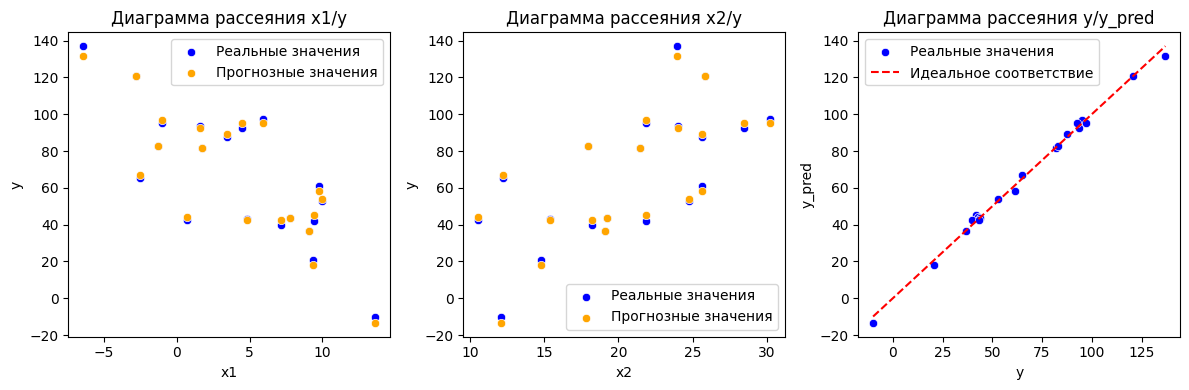

In [161]:
# КРИТЕРИЙ 13

# расчет коэффициентов "чистой" регрессии
b_x1 = model.params.x1 * df4['y'].std() / df4['x1'].std()
b_x2 = model.params.x2 * df4['y'].std() / df4['x2'].std()
a = df4['y'].mean() - b_x1 * df4['x1'].mean() - b_x2 * df4['x2'].mean()
print(f'Коэффициенты чистой регрессии:\na = {a}\nb_x1 = {b_x1}\nb_x2 = {b_x2}')

# построение диаграмм рассеяния прогнозных и реальных значений на одном графике
df4['y_pred'] = a + b_x1 * df4['x1'] + b_x2 * df4['x2']

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x=df4['x1'], y=df4['y'], color='blue', label='Реальные значения')
sns.scatterplot(x=df4['x1'], y=df4['y_pred'], color='orange', label='Прогнозные значения')
plt.title('Диаграмма рассеяния x1/y')
plt.xlabel('x1')
plt.ylabel('y')

plt.subplot(1, 3, 2)
sns.scatterplot(x=df4['x2'], y=df4['y'], color='blue', label='Реальные значения')
sns.scatterplot(x=df4['x2'], y=df4['y_pred'], color='orange', label='Прогнозные значения')
plt.title('Диаграмма рассеяния x2/y')
plt.xlabel('x2')
plt.ylabel('y')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df4['y'], y=df4['y_pred'], color='blue', label='Реальные значения')
sns.lineplot(x=[min(df4['y']), max(df4['y'])], y=[min(df4['y']), max(df4['y'])], color='red', linestyle='--', label='Идеальное соответствие')
plt.title('Диаграмма рассеяния y/y_pred')
plt.xlabel('y')
plt.ylabel('y_pred')

plt.tight_layout()
plt.show()

In [164]:
# КРИТЕРИЙ 14

# расчет индекса множественной корреляции
r_x1 = corr_m['y']['x1']
r_x2 = corr_m['y']['x2']
R = model.params.x1 * r_x1 + model.params.x2 * r_x2
print('Индекс множественной регрессии R =', R)
# расчет F-критерия
alpha = 0.05
n = df4.shape[0]
f = (R**2 / (1 - R**2)) * ((n - 1 - 2) / 2)
critical = sc.stats.f.ppf(1-alpha, 2, n - 1 - 2)
print(f'f={f}\nТабличное значение = {critical}')

Индекс множественной регрессии R = 0.9957525438616113
f=994.2284366834715
Табличное значение = 3.5915305684750827


In [ ]:
# вывод о статистической значимости уравнения в целом

f-критерий во много раз больше критического, поэтому уравнение статистически значимое.

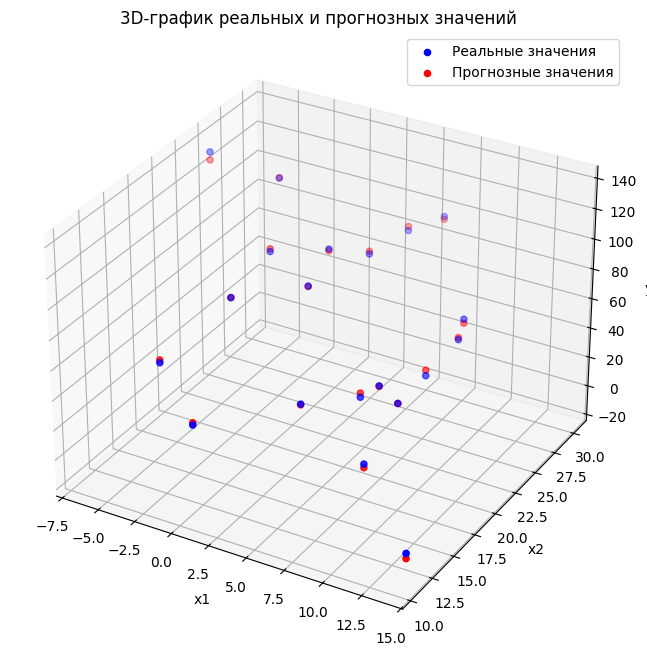

In [169]:
# КРИТЕРИЙ 15

# построение 3D-изображения прогнозных и реальных значений на одном графике
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

# реальные значения
ax.scatter(df4['x1'], df4['x2'], df4['y'], color='blue', label='Реальные значения')

# прогнозные значения
ax.scatter(df4['x1'], df4['x2'], df4['y_pred'], color='red', label='Прогнозные значения')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.legend()

plt.title('3D-график реальных и прогнозных значений')
plt.show()